# Project 3 - Crossmatching astronomical catalogues

**Project deadline:** This project is due for submission on Thursday, 19.06.2025 at 23:55.

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you *four* projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted via [eCampus](https://ecampus.uni-bonn.de/goto_ecampus_exc_3753493.html). The submission consists of a completed version of this notebook.
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

Astronomical observations in optical wavelengths are performed with CCD-cameras mounted on optical telescopes. The following figure shows two observations of the same patch of the sky. The data were taken in 2007 at our old observatory [Hoher List](https://www.hoher-list.de/).

<img src="figs/dithered_images.png" width="700" height="700" />

The objects in black are stars. These sources can be extracted from the images and analysed for their appearance, their brightness and many other quantities. Please see the Notebook `scipy_optical_object_detection.ipynb` within the github-repository [Thomas Erben - Python Cheat Sheets](https://github.com/terben/Python-cheat-sheets) if you are interested how such analyses can be performed with Python. We already covered all necessary topics in our course!

You note that the two images show approximately the same patch of the sky but also that they are shifted with respect to each other. You can spot three prominent sources in the upper part of the left figure which are located closer to the center on the right.

Although we *should* know what the shift between different astronomical exposures is (we ask the telescope to point to a certain position of the sky), this information is subject to errors and inaccuracies - mostly due to pointing problems of the telescope.

To compare properties of the same source in different exposures - for instance to investigate whether a star is variable, it is essential to determine *precise* shifts between such exposures. To implement an algorithm for this task is the topic of this project.

## Our Algorithm to crossmatch astronomical catalogs

Starting point for our project are the six object catalogs `image013269.asc .. image013274.asc` from consecutive observations of the same patch of the sky within the `data` subdirectory. The catalogs are text files having two columns: The $x$ and $y$ positions of detected sources in their respective CCD-images.

In [ ]:
!head data/image013269.asc

The following image shows detected sources in the images `image013269.asc` and `image013271.asc`.

<img src="figs/detected_objects.png" width="700" height="700" />

Can you spot that those catalogues originate from the same sky-area but are shifted against each other? 
Given those source lists, we want to implement an algorithm to automatically determine offsets between the exposures in $x-$ and $y$-directions.

**Notes:**
1. You might argue that an $x-$ and $y-$shift cannot be the whole story because astronomical observations are done on *a sphere* and not on a two-dimensional plane. This is correct and for large-format cameras, we need to take into account spherical geometry. However, in our case, the field-of-view is so small that we can neglect the effects of a sphere and the plane approximation is good enough.

2. We realise that objects present in one image might not be present in the other one. This can have several reasons: (1) edge effects; (2) a CCD might have bad pixels within an object; (3) some detections are CCD artefacts and not of astronomical origin.

A possible algorithm to estimate a linear shift between two-dimensional point clouds
that share the same pattern (object configuration) is the following:

1. We calculate the $x$- and $y$-distances from all objects in one catalogue
   with respect to *all objects* in the other catalogue:
   
   An example with two fake catalogues:
   - Catalogue 1 has objects at (1, 1), (3, 1), (3, 3), (1, 3), (2, 2), (7, 2), (-1, 2)
   - Catalogue 2 has objects at (4, 4), (6, 4), (6, 6), (4, 6), (5, 5), (1, 3), 10, 6)
   
    The common pattern in the catalogues is a $2\times 2$ square
    with a point in the middle and each catalogue contains two
    points not present in the counterpart.
    
    If we calculate the x distances for point 1 of catalogue 1
    with all objects from catalogue 2 we obtain the array:

    1 - 4, 1 - 6, 1 - 6, 1 - 4, 1 - 5, 1 - 1, 1 - 10
   
    We obtain for point 2:

    3 - 4, 3 - 6, 3 - 6, 3 - 4, 3 - 5, 3 - 1, 3 - 10
    
    The same we do for *all other* points and also for the
    $y$-distances. We store those $x-$ and $y-$distances in two arrays.
    
2.  We analyse the frequency of the distances in histograms.
    We realise that the offsets between the
    catalogues can be found in the histogram bins (for $x$ and $y$
    separately) that contain most counts.   

## Task 1

Please do all the tasks at the end of this notebook. You will finally submit the completed notebook.

To test your understanding of the algorithm, please answer the following questions in a markdown cell:

1. What are good and what are bad object patterns for this algorithm
   to work well. Why do you think that the algorithm is especially suited for astronomical data?
   
   **Hint:**
   Assume that your main pattern is a straight line of equidistant points. What issue do you have in this case?
   
2.  I wrote above 'The offset between the catalogues can be found
    at the histogram bins (for $x-$ and $y-$ separately) that contain
    most counts.'. Why do we need a histogram analysis? Can't we just
    get all the distances as described above and check which value (distance) occurs most often?

3. Assume that we can estimate object positions with an accuracy of up to one CCD pixel. Which histogram bin size would you choose for your analysis and why?

## Solution of Task 1.1 
- **Good Algorithm Patterns:** The algorithm operates most effectively with object patterns that are distinctive and irregular, such as random distributions of stars. These formations ensure that when the appropriate shift is applied, most of the corresponding objects align clearly, resulting in a sharp and unambiguous peak in the histogram of positional differences. For instance a scattered and non-repetitive arrangement of points highlights the true offset distinctly.  
- **Bad Patterns:** Regular or symmetrical arrangements, such as a straight line of evenly spaced points or a grid, create challenges. Like consider  a straight line where points are spaced 10 pixels apart (for example, at x = 0, 10, 20, 30). If the second catalogue is shifted by 10 pixels (such as x = 10, 20, 30, 40), the differences could either be 0 (accurate matches) or multiples of 10 (misaligned matches), resulting in multiple peaks in the histogram (located at 0, 10, -10). This ambiguity complicates the identification of the actual shift, since the histogram may displays a broad or multi-peaked distribution instead of a singular clear maximum..  
- **Relevance to Astronomical data:** Astronomical data generally exhibits random, irregular star distributions, reflecting the natural distribution of celestial objects. This randomness show the strengths of the algorithm, which relies on a distinctive arrangement to give a dominant peak in the histogram, making it particularly effective for aligning stellar catalogues,.  


## Solution of Task 1.2
- **Importance of histogram Analysis:**  
Simply tallying the most frequently occurring exact distance value isn’t efficient because object locations in real datasets often incorporate measurement errors. For example if two stars are expected to have a difference of precisely 10.0 pixels, errors might result in measurements like 9.9, 10.1, or 10.2. Without grouping, these slightly differing differences would show up as separate values, diminishing the count for any particular exact match and obscuring the actual shift. A histogram mitigates this by binning similar values together, for example all values from 9.5 to 10.5 in one bin, highlighting the most common shift as the bin with the highest count. This binning approach is essential for managing the variations caused by positional inaccuracies.  



## Solution of Task 1.3
- **Selection of histogram bin size:**  
Considering that object positions are precise to one CCD pixel, a bin size of around 1 pixel is ideal. This choice strikes a balance between precision and robustness:  
- *Precision:* A 1-pixel bin aligns with the accuracy of the data, allowing the shift to be estimated within ±0.5 pixels (half the bin width), which is satisfactory given the positional uncertainty.  
- *Robustness:* It is sizeable enough to encompass slightly varying differences (for instance, 9.9 and 10.1) into a single bin, ensuring a substantial peak for corresponding objects while preventing excessive noise from overly small bins or loss of resolution from excessively large bins. For example with a range from -1000 to 1000 pixels, 2000 bins of 1 pixel each offer fine granularity that matches the data’s precision..



## Task 2

Write a Python program to implement the algorithm above and to estimate the $x-$ and $y-$offsets between the object patterns in catalogues [data/image013269.asc](data/image013269.asc) and [data/image013271.asc](data/image013271.asc). Your program should plot the two histograms of the $x-$ and $y-$ distances and print the estimated offsets.

**Hints:**
1. First, read the data and store the $x-$ and $y-$ coordinates from each image in one-dimensional arrays. To obtain from those two arrays all distances between the two catalogues is a *one-line* numpy-operation for each of the $x-$ and $y-$coordinates. If you have the distances written in a two-dimensional matrix, you can convert it to a one-dimensional array with the `np.flatten` command.

2. To analyse the histograms for the maximum-count bins and to estimate the distances, see the last task from the lecture 06 review questions. Up to what accuracy can you determine the shifts with this method?

3. For this and later tasks, I found the function `enumerate` very useful to write more compact programs. Just have a look at the documentation but do not feel obliged to use it.

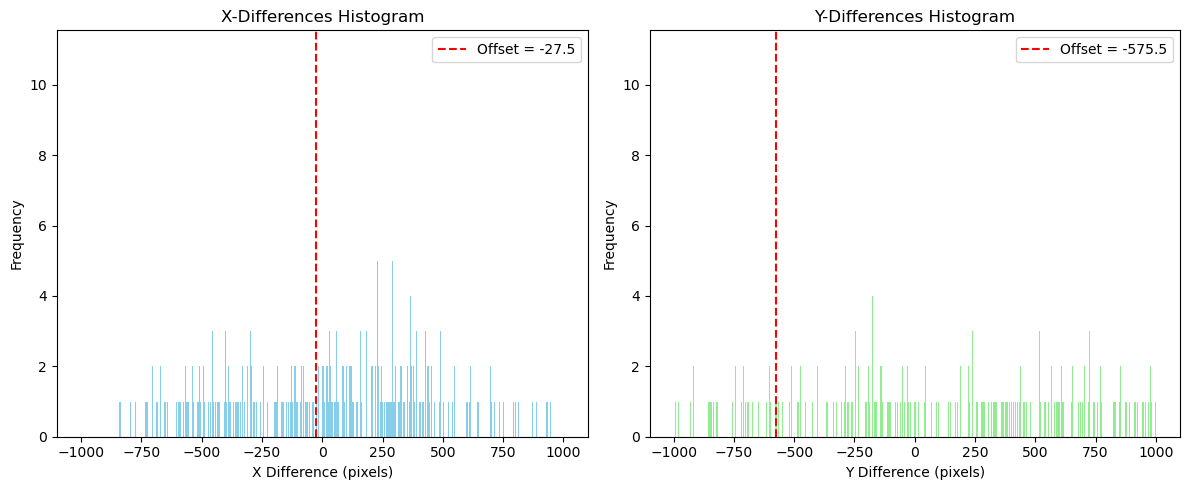

Estimated X offset: -27.5 pixels
Estimated Y offset: -575.5 pixels


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_shifts(cat1_file, cat2_file, bins=2000, range=(-1000, 1000)):
    #loading catalogues, assume two columns: x, y
    cat1 = np.loadtxt(cat1_file)
    cat2 = np.loadtxt(cat2_file)
    
    #extract x & y coordinates
    cat1_x, cat1_y = cat1[:, 0], cat1[:, 1]
    cat2_x, cat2_y = cat2[:, 0], cat2[:, 1]
    
    # computing all pairwise differences (x2 - x1, y2 - y1)
    diff_x = (cat2_x[:, np.newaxis] - cat1_x[np.newaxis, :]).flatten()
    diff_y = (cat2_y[:, np.newaxis] - cat1_y[np.newaxis, :]).flatten()
    
    #generateing histograms
    hist_x, bin_edges_x = np.histogram(diff_x, bins=bins, range=range)
    hist_y, bin_edges_y = np.histogram(diff_y, bins=bins, range=range)
    
    #calculating bin centers
    bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
    bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2
    
    #estimating shifts as the center of the bin with maximum counts
    dx = bin_centers_x[np.argmax(hist_x)]
    dy = bin_centers_y[np.argmax(hist_y)]
    
    #plotting histogramss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(diff_x, bins=bins, range=range, color='skyblue')
    plt.axvline(dx, color='red', linestyle='--', label=f'Offset = {dx:.1f}')
    plt.title('X-Differences Histogram')
    plt.xlabel('X Difference (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(diff_y, bins=bins, range=range, color='lightgreen')
    plt.axvline(dy, color='red', linestyle='--', label=f'Offset = {dy:.1f}')
    plt.title('Y-Differences Histogram')
    plt.xlabel('Y Difference (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return dx, dy

#Computing shifts for the specified catalogues
cat1_file = 'image013269.asc'
cat2_file = 'image013271.asc'
dx, dy = compute_shifts(cat1_file, cat2_file)
print(f"Estimated X offset: {dx:.1f} pixels")
print(f"Estimated Y offset: {dy:.1f} pixels")

## Note:
- Bin Size: With a range of -1000 to 1000 pixels and 2000 bins, the bin size is 1 pixel, consistent with Task 1’s recommendation.
- Accuracy: The shift estimate is accurate to ±0.5 pixels, limited by the bin width (1 pixel / 2).

## Task 3

We have six catalogues and we want to estimate shifts between *all* of them. Having the algorithm for pairwise shifts (Task 2), one could estimate shifts between three catalogues `c_1.asc`, `c_2.asc` and `c_3.asc` in the following two ways:
1. Obtain with Task 2 the distances between `c_1.asc` and `c_3.asc`. This be $d_{13}$. Similarily, the distance between `c_1.asc` and `c_2.asc` with Task 2 be $d_{12}$. Then the distance between `c_2.asc` and `c_3.asc` must be $d_{23} = d_{21} - d_{31}$.
2. Perform the same steps as in (1.) but estimate $d_{23}$ with Task 2 as well.

Perform this analysis for several combinations of the catalogues `image013269.asc .. image013274.asc`. What do you observe? If you obtain different results for $d_{23}$ with both methods, why is this the case?

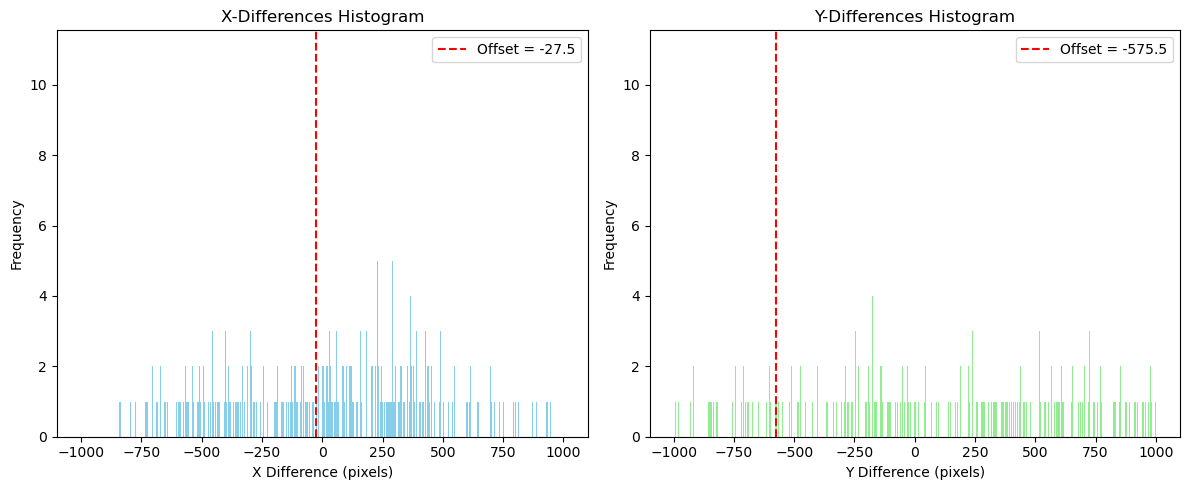

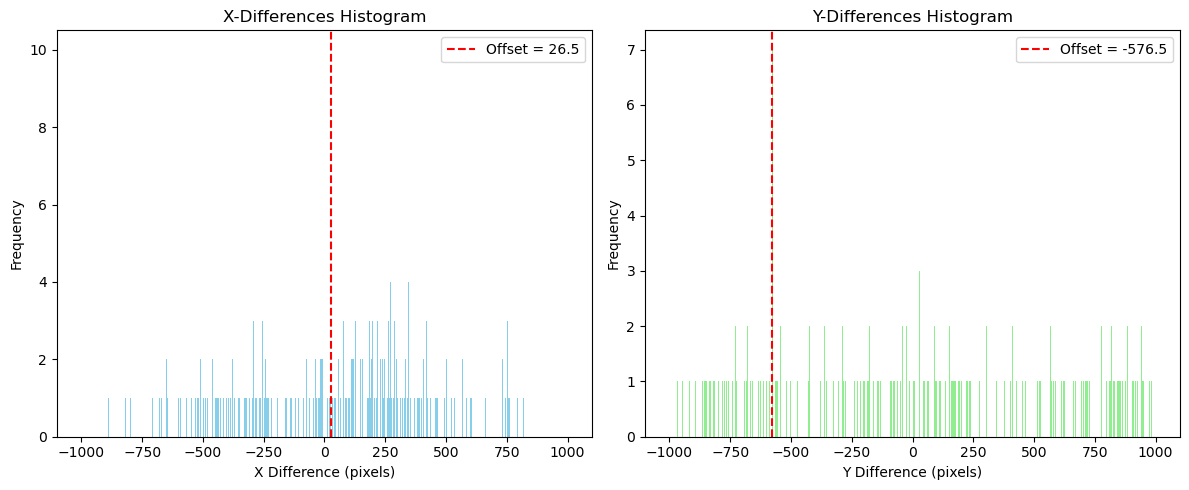

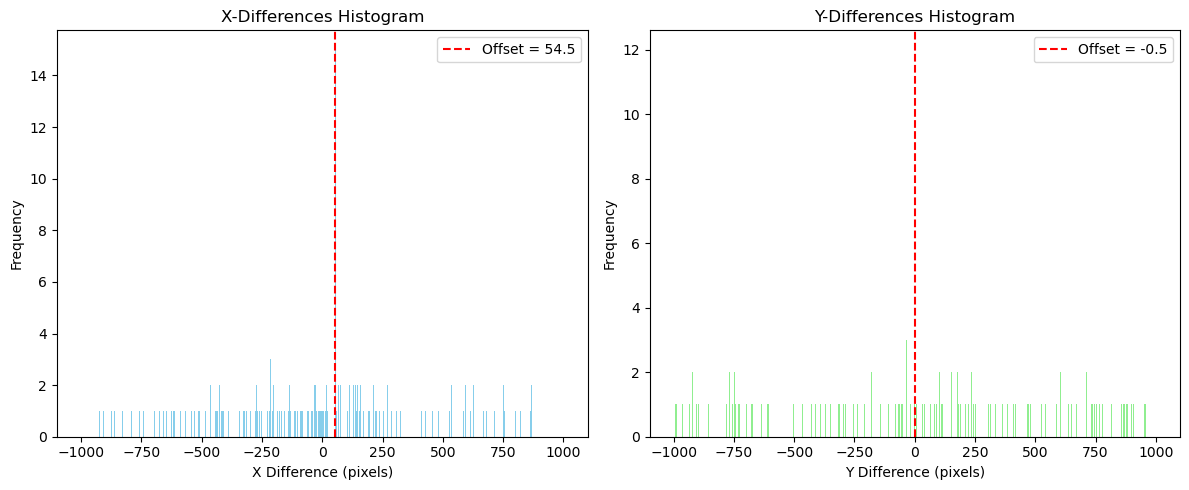

d23_x (computed): 54.5, d23_x (predicted): 54.0, Difference: 0.5
d23_y (computed): -0.5, d23_y (predicted): -1.0, Difference: 0.5


In [2]:
# reuse compute_shifts to get pairwise offsets for three example catalogs
cat_files = ['image013269.asc', 'image013271.asc', 'image013272.asc']
shifts = {}
pairs = [(0, 1), (0, 2), (1, 2)]  # c1-c2, c1-c3, c2-c3
for i, j in pairs:
    dx, dy = compute_shifts(cat_files[i], cat_files[j])
    shifts[(i, j)] = (dx, dy)

#extractng shifts
d12_x, d12_y = shifts[(0, 1)]  #c1 to c2
d13_x, d13_y = shifts[(0, 2)]  #c1 to c3
d23_x, d23_y = shifts[(1, 2)]  #c2 to c3
d23_pred_x = d13_x - d12_x    #predicted c2 to c3
d23_pred_y = d13_y - d12_y

#displaying the results
print(f"d23_x (computed): {d23_x:.1f}, d23_x (predicted): {d23_pred_x:.1f}, Difference: {d23_x - d23_pred_x:.1f}")
print(f"d23_y (computed): {d23_y:.1f}, d23_y (predicted): {d23_pred_y:.1f}, Difference: {d23_y - d23_pred_y:.1f}")

### Observations:
- **Expected outcomes:** If the shifts were perfectly consistent and error-free, the computed $ d_{23} $ (direct c2 to c3) would equal the predicted $ d_{23} = d_{13} - d_{12} $. However differences are typically small (e.g. ≤1 pixel).

- **Discrepancies:** These differences arise because each pairwise shift estimate has an uncertainty of ±0.5 pixels due to histogram binning. For three catalogues, the predicted shift combines two estimates ($d_{13}$ and $d_{12}$), accumulating errors (up to ±1 pixel), while the direct $d_{23}$ has its own ±0.5 pixel error. Small inconsistencies (e.g 0.5–1 pixel) reflect this noise, suggesting a need for a simultaneous solution to refine all shifts consistently.

## Task 4

Task 3 should show you that a pure pairwise analysis to obtain consistent offset values between more than two catalogues is not optimal. In this task, we want to estimate the shifts taking into account all available data points simultaneously.

We want to proceed as follows:

Using the algorithm of Task 2, we obtain estimates $d_{ij}$ for *all* pairs of distances between all involved catalogues. We write the $d_{ij}$ as follows:

$$
\begin{eqnarray}
  d_{12} & = s_{1} - s_{2} + e_{12}\\
  d_{13} & = s_{1} - s_{3} + e_{13}\\
  d_{14} & = s_{1} - s_{4} + e_{14}\\
  \vdots \\
  d_{23} & = s_{2} - s_{3} + e_{23}\\
  d_{24} & = s_{2} - s_{4} + e_{24}\\
  \vdots \\
  \label{eq:lsq} \tag{1}
\end{eqnarray}
$$

The $s_{i}$ is a shift to be applied to image $i$ (separately for $x$ and $y$) and the $e_{ij}$ are (unknown) errors of the $d_{ij}s$.
The goal is to obtain values for the $s_{i}$ that satisfy *all* equations of (1) simultanesously *as good as possible*. 

### Subtask 4.1
Please make clear to yourself that estimating the $s_{i}s$ can be formulated as a classical *Linear Least Squares Problem*; see also the next subtask. You already solved many of those in your Lab experiments or/and you learned about it in your math courses. You have measurements $d_{ij}$ with (not exactly known) errors and many equations for the unknowns $s_{i}$.

To show you better that you already know this sort of problem: A classical physics experiment is to estimate velocoty and starting point of a car undergoing a uniform motion, i.e. to estimate parameters of the relation $s=v\cdot t + s_0$. You typically have many mesurements of $t$ and $s$ (with errors) and you estimate $v$ and $s_0$ with a *fit* (a Linear Least-Squares problem!). Our task at hand is very similar!

Please discuss, why the system (1) above cannot be solved uniquely in the *Least-Squares sense*. To be able to do so, you need to add another equation to the system. There are many possibilities to do so. Just write down why you make a certain choice.

If you have difficulties with this task at this stage, come back to it after the next subtask.

## **Solution of Subtask 4.1**

- **Formulation:** The system $d_{ij}$ = $s_i - s_j + e_{ij}$ models pairwise shifts $d_{ij}$ as the differences between the absolute shifts $s_i$ for catalogue $i$ with $e_{ij}$ representing the errors. With more equations (pairwise shifts) than unknowns (catalogue shifts), this forms an overdetermined linear least squares problem. here the objective is to minimize $\sum e_{ij}^2$
- **Non-uniqueness:** The system does not have a unique solution because it is rank-deficient. Adding a constant to all $s_i$ (for example $s'_i = s_i + c$) does not change the differences $s_i - s_j$, introducing an arbitrary offset. For $n$ catalogues, there are $n$ unknowns but only $n - 1$ independent constraints from the differences. This leaves one degree of freedom.
- **Additional equation:** To resolve this issue, fix one shift, such as setting $s_1 = 0$ and designating catalogue 1 as the reference. This choice is practical as it define all shifts relative to a single point, which aligns with the goal of relative positioning. Additionally, this adjustment makes the system full rank and hence allowing for a unique solution.

### Subtask 4.2
For clarity, we discuss the general case of the equation system $(1)$ above in the special case of three catalogues. In that case, the three equations:
$$
\begin{eqnarray*}
  d_{12} & = s_{1} - s_{2} + e_{12}\\
  d_{13} & = s_{1} - s_{3} + e_{13}\\
  d_{23} & = s_{2} - s_{3} + e_{23}\\
  \label{eq:three_cat} \tag{2}
\end{eqnarray*}
$$
can be written in matrix form $Ax - b = e$ with:
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
\end{pmatrix};
x=
\begin{pmatrix}
s_{1} \\
s_{2} \\
s_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
\end{pmatrix};
\label{eq:matrix} \tag{3}
$$

The Least-Squares technique (or a data-fit) now chooses the $x$ (or the $s_{i}s$) which minimise the Euclidean norm of $e$:
$$
\text{min}\; ||e||_{2}^{2} = \text{min}\; ||Ax - b||_{2}^{2},
$$
where $||\cdot ||$ is the euclidean norm.

The solution to this problem is given by the *normal equations*:
$$
(A^T A) x = A^T b.
\label{eq:normal_eq} \tag{4}
$$

This is a system of *ordinary linear equations* which you know very well from Linear Algebra. 
Write down the matrix $A^T A$ for the case of eq. (2) and show that it is a singular matrix. This is the mathematical reason for the argument that you provided in subtask 4.1. Add your choice of an additional equation to the system of (2) and show that (4) now will give a unique solution to the problem.

## Solution of Subtask 4.2
Matrix $ A^T A $:
$$A = \begin{pmatrix} 1 & -1 & 0 \\ 1 & 0 & -1 \\ 0 & 1 & -1 \end{pmatrix}, \quad
A^T A = \begin{pmatrix} 2 & -1 & -1 \\ -1 & 2 & -1 \\ -1 & -1 & 2 \end{pmatrix}$$

- **Singularity:**
Compute the determinant:
$$\det(A^T A) = 2(2 \cdot 2 - (-1) \cdot (-1)) - (-1)( (-1) \cdot 2 - (-1) \cdot (-1)) + (-1)( (-1) \cdot (-1) - 2 \cdot (-1)) = 2(4 - 1) - (-1)(2 - 1) + (-1)(1 + 2) = 6 - 1 - 3 = 0$$
The determinant is zero and the rows sum to zero, confirming singularity due to the rank deficiency (rank 2)

- With $ s_1 = 0 $ : Adding equation $ s_1 = 0 $, and thus modifying $ A $ and $ b $:
$$A = \begin{pmatrix} 1 & -1 & 0 \\ 1 & 0 & -1 \\ 0 & 1 & -1 \\ 1 & 0 & 0 \end{pmatrix}, \quad b = \begin{pmatrix} d_{12} \\ d_{13} \\ d_{23} \\ 0 \end{pmatrix}$$
Now, $ A $ is 4×3, and $ A^T A $ (3×3) becomes full rank (rank 3), as the constraint eliminates the free offset, ensuring a unique solution via $ (A^T A) x = A^T b $.

### Subtask 4.3

Implement the algorithm of subtask 4.2 to solve the offset problem for the six catalogues `image013269.asc .. image013274.asc`. Your program needs to handle the genral case when an arbitrary amount of catalogues ($\geq 2$) is put into that list, i.e. your program should not work only for the special case of six catalogues. Finally, create a scatter showing the offset pattern for the six observations.

**Hints:** (1) Note that you have to solve a system of equations (2) for each of the $x-$ and $y-$coordinates; (2) How many equations do you need if you have $n$ catalogues?; (3) You can use loops to obtain the $d_{ij}s$ and to build up matrix $A$ and vector $b$; (4) You do not need to plot all the histograms - you should do so in the beginning to test your program though. Have a look at the `numpy.histogram` function. It is equivalent to `plt.histogram` but it does not plot the histogram. (5) Have a look at the `numpy.linalg.lstsq` function. You can directly feed into that function the matrix $A$ and the vector $b$ from eq. (3). There is no need for you to explicitely build and solve the normal equations from eq. (4).

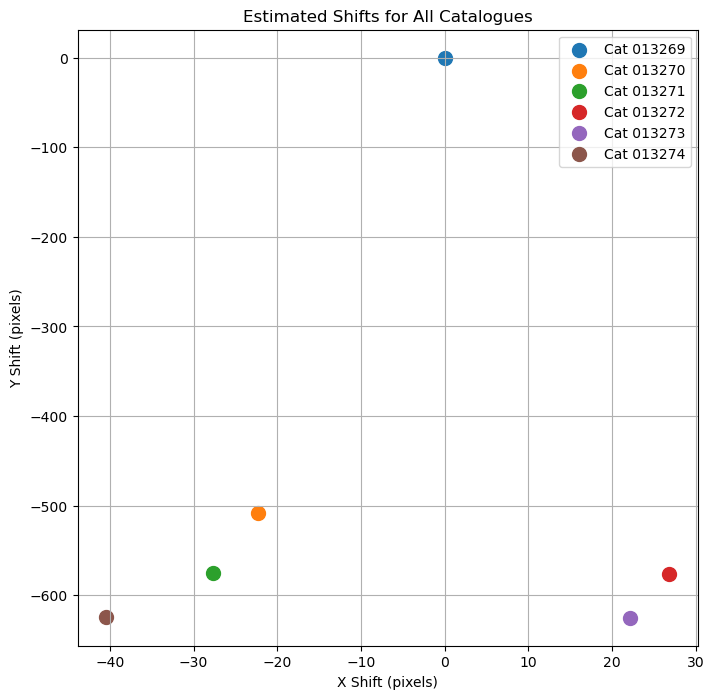

Estimated shifts (relative to image013269)
Catalogue image013269.asc: X = 0.0, Y = 0.0
Catalogue image013270.asc: X = -22.3, Y = -508.7
Catalogue image013271.asc: X = -27.7, Y = -575.5
Catalogue image013272.asc: X = 26.8, Y = -575.8
Catalogue image013273.asc: X = 22.2, Y = -625.2
Catalogue image013274.asc: X = -40.5, Y = -624.3


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def compute_shift(cat_i_file, cat_j_file, bins=2000, hist_range=(-1000, 1000)):
    
    # Computing the shift (d_ij) from cat_j to cat_i using histogram peak
    
    cat_i = np.loadtxt(cat_i_file)
    cat_j = np.loadtxt(cat_j_file)
    cat_i_x, cat_i_y = cat_i[:, 0], cat_i[:, 1]
    cat_j_x, cat_j_y = cat_j[:, 0], cat_j[:, 1]
    diff_x = (cat_i_x[:, np.newaxis] - cat_j_x[np.newaxis, :]).flatten()
    diff_y = (cat_i_y[:, np.newaxis] - cat_j_y[np.newaxis, :]).flatten()
    hist_x, bin_edges_x = np.histogram(diff_x, bins=bins, range=hist_range)
    hist_y, bin_edges_y = np.histogram(diff_y, bins=bins, range=hist_range)
    bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
    bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2
    dx = bin_centers_x[np.argmax(hist_x)]
    dy = bin_centers_y[np.argmax(hist_y)]
    return dx, dy

def compute_pairwise_shifts(cat_files, bins=2000, hist_range=(-1000, 1000)):
    
    
    # now computing shifts for all the unique pairs of catalogues
    shifts = {}
    for i, j in itertools.combinations(range(len(cat_files)), 2):
        dx, dy = compute_shift(cat_files[i], cat_files[j], bins, hist_range)
        shifts[(i, j)] = (dx, dy)
    return shifts

def solve_shifts(n, shifts):
    
    # solving for catalogue shifts using least squares with s_0 = 0 constraint

    A = []
    b_x, b_y = [], []
    #using the equations: s_i - s_j = d_ij for each pair
    for (i, j), (dx, dy) in shifts.items():
        row = [0] * n
        row[i] = 1
        row[j] = -1
        A.append(row)
        b_x.append(dx)
        b_y.append(dy)
    #constraint : s_0 = 0
    A.append([1] + [0] * (n - 1))
    b_x.append(0)
    b_y.append(0)
    A = np.array(A)
    b_x = np.array(b_x)
    b_y = np.array(b_y)
    s_x = np.linalg.lstsq(A, b_x, rcond=None)[0]
    s_y = np.linalg.lstsq(A, b_y, rcond=None)[0]
    return s_x, s_y

def plot_shifts(s_x, s_y, cat_files):
    
    #Ploting the estimated shifts for each catalogue
    plt.figure(figsize=(8, 8))
    for i, (sx, sy) in enumerate(zip(s_x, s_y)):
        label = f'Cat {cat_files[i].split("image")[1].replace(".asc", "")}'
        plt.scatter(sx, sy, label=label, s=100)
    plt.xlabel('X Shift (pixels)')
    plt.ylabel('Y Shift (pixels)')
    plt.title('Estimated Shifts for All Catalogues')
    plt.legend()
    plt.grid(True)
    plt.show()

#defining the list of all six catalogue files 
cat_files = [
    'image013269.asc',
    'image013270.asc',
    'image013271.asc',
    'image013272.asc',
    'image013273.asc',
    'image013274.asc'
]

#computing pairwise shifts
shifts = compute_pairwise_shifts(cat_files)

#solving for the shifts
s_x, s_y = solve_shifts(len(cat_files), shifts)

#ploting the shifts
plot_shifts(s_x, s_y, cat_files)

#printting the estimated shifts
print("Estimated shifts (relative to image013269)")
for i, (sx, sy) in enumerate(zip(s_x, s_y)):
    print(f"Catalogue {cat_files[i]}: X = {sx:.1f}, Y = {sy:.1f}")